# Mono resistance EDA

In this POC, we gloss over the resistance towards distinct drugs and focus only on the mono-resistance.


In [10]:

from __future__ import print_function
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set_context('paper')



def print_ln():
    print('-' * 80, '\n')


DATA_LOCATION  = "../../data/"

## EDA for Tb-profiler results

In [3]:
# Read data for ALL genomes in the cohort

tbprofiler_df = pd.read_json(DATA_LOCATION + "raw/cohort.tbprofiler.json", encoding="UTF-8")
tbprofiler_df = tbprofiler_df.transpose()
tbprofiler_df.head()


,rifampicin,isoniazid,pyrazinamide,ethambutol,streptomycin,fluoroquinolones,moxifloxacin,ofloxacin,levofloxacin,ciprofloxacin,...,cycloserine,linezolid,bedaquiline,clofazimine,delamanid,main_lin,sublin,drtype,MDR,XDR
SRR1162996,rpoB_p.His445Asp,"katG_p.Ser315Thr, fabG1_c.-15C>T",pncA_p.Asp49Gly,"embA_c.-12C>T, embB_p.Gln497Arg",rrs_r.514a>c,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,gyrB_p.Asp461Asn,...,alr_p.Leu113Arg,-,-,-,-,lineage4,lineage4.3.3,XDR,R,R
SRR6356985,"rpoB_p.Ser450Leu, rpoC_p.Leu527Val","katG_p.Ser315Thr, fabG1_c.-15C>T",-,embB_p.Met306Ile,rpsL_p.Lys43Arg,-,-,-,-,-,...,-,-,-,-,-,lineage2,lineage2.2.1,MDR,R,
SRR10525347,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,lineage4,lineage4.1.2.1,Sensitive,,
SRR5153132,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,lineage4,lineage4.1.2.1,Sensitive,,
SRR10380131,rpoB_p.Ser450Leu,katG_p.Ser315Thr,-,embB_p.Met306Ile,rpsL_p.Lys43Arg,-,-,-,-,-,...,-,-,-,-,-,lineage2,lineage2.2.1,MDR,R,


In [4]:
tbprofiler_df.shape

(2654, 26)

In [5]:
# Select the train (Tb-portals) data

# Read the genomes IDs of genomes
# - Tb-portals (ALL/ Train)
# - HTBC (ALL/ Test)

import json

with open(DATA_LOCATION + "test_train_genome_ids.json") as f:
    all_genomes_ids_dict = json.load(f)

final_tbportals_train_genome_ids =  all_genomes_ids_dict['final_tbportals_train_genomes']
final_htbc_test_genome_ids = all_genomes_ids_dict['final_htbc_test_genomes']


In [11]:
# Read the binarized tb_profiler results from step-002

binarized_resistance_status_df = pd.read_csv(DATA_LOCATION +  "processed/binarized_resistance_status_df.csv").rename(columns={'Unnamed: 0' : 'SampleID'}).set_index('SampleID')

binarized_resistance_status_df.head(10)


,rifampicin_resistance,isoniazid_resistance,pyrazinamide_resistance,ethambutol_resistance,streptomycin_resistance,fluoroquinolones_resistance,moxifloxacin_resistance,ofloxacin_resistance,levofloxacin_resistance,ciprofloxacin_resistance,...,linezolid_resistance,bedaquiline_resistance,clofazimine_resistance,delamanid_resistance,main_lin,sublin,drtype,MDR,XDR,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR1162996,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,lineage4,lineage4.3.3,XDR,R,R,Resistant
SRR6356985,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,lineage2,lineage2.2.1,MDR,R,NaN,Resistant
SRR10525347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.1.2.1,Sensitive,NaN,NaN,Sensitive
SRR5153132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.1.2.1,Sensitive,NaN,NaN,Sensitive
SRR10380131,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,lineage2,lineage2.2.1,MDR,R,NaN,Resistant
SRR1163399,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,lineage4,lineage4.3.3,XDR,R,R,Resistant
SRR5153316,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.2.1,MDR,R,NaN,Resistant
SRR10525375,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,lineage4,lineage4.1.2.1,MDR,R,NaN,Resistant
SRR10525332,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,lineage4,lineage4.8,MDR,R,NaN,Resistant


#### Create data frame for train dataset


In [ ]:
binarized_resistance_status_train_df = binarized_resistance_status_df.loc[final_tbportals_train_genome_ids]
binarized_resistance_status_train_df.head()


#### Create data frame for test dataset


In [ ]:
binarized_resistance_status_test_df = binarized_resistance_status_df.loc[final_htbc_test_genome_ids]
binarized_resistance_status_test_df.head()

#### Analyze the train and test datasets

In [ ]:
binarized_resistance_status_train_df.describe().T


#### Resistance and Sensitive genomes


<AxesSubplot:>

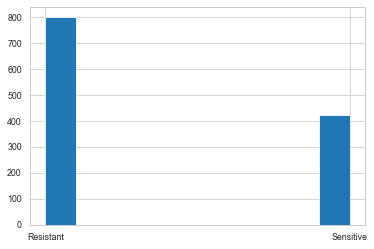

In [17]:
binarized_resistance_status_train_df['Resistance_Status'].hist()


<AxesSubplot:>

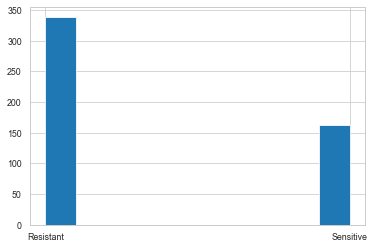

In [18]:
binarized_resistance_status_test_df['Resistance_Status'].hist()


#### Lineage distribution


<AxesSubplot:>

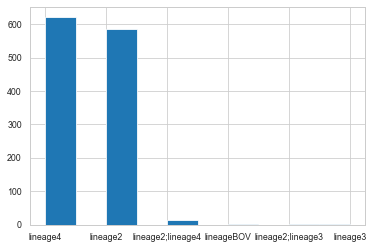

In [15]:
binarized_resistance_status_train_df['main_lin'].hist()


<AxesSubplot:>

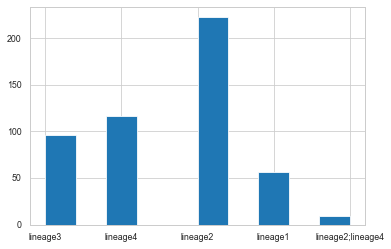

In [16]:
binarized_resistance_status_test_df['main_lin'].hist()


#### Find the relationship between drtype and main_lin variables

In [20]:
binarized_resistance_status_train_df.groupby(['drtype','main_lin']).size()

drtype          main_lin         
Drug-resistant  lineage2              30
                lineage2;lineage4      1
                lineage4              48
                lineageBOV             1
MDR             lineage2             261
                lineage2;lineage3      1
                lineage2;lineage4      5
                lineage4             161
Sensitive       lineage2             125
                lineage3               1
                lineage4             296
XDR             lineage2             170
                lineage2;lineage4      6
                lineage4             116
dtype: int64

In [21]:
binarized_resistance_status_test_df.groupby(['drtype','main_lin']).size()

drtype          main_lin         
Drug-resistant  lineage1             14
                lineage2             62
                lineage3             11
                lineage4             25
MDR             lineage1              6
                lineage2             74
                lineage2;lineage4     6
                lineage3             51
                lineage4             38
Sensitive       lineage1             35
                lineage2             66
                lineage2;lineage4     2
                lineage3              9
                lineage4             49
XDR             lineage1              1
                lineage2             20
                lineage2;lineage4     1
                lineage3             25
                lineage4              4
dtype: int64

#### Stacked Column Chart: visual form of the two-way table


<AxesSubplot:xlabel='main_lin'>

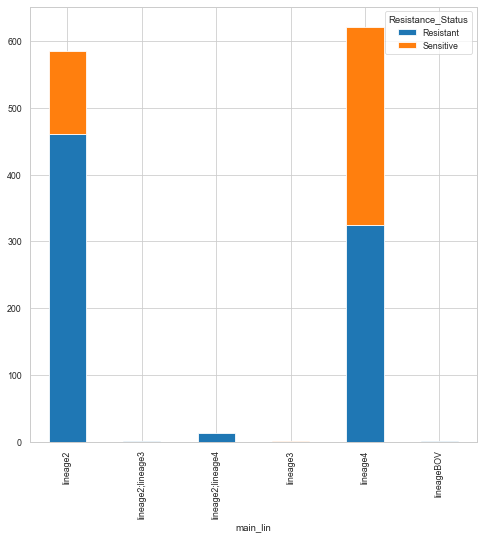

In [26]:
# binarized_resistance_status_train_df.groupby(['drtype','sublin']).size()

pd.crosstab(index= binarized_resistance_status_train_df['main_lin'], columns=binarized_resistance_status_train_df["Resistance_Status"]).plot(kind="bar", figsize=(8,8), stacked=True)

<AxesSubplot:xlabel='main_lin'>

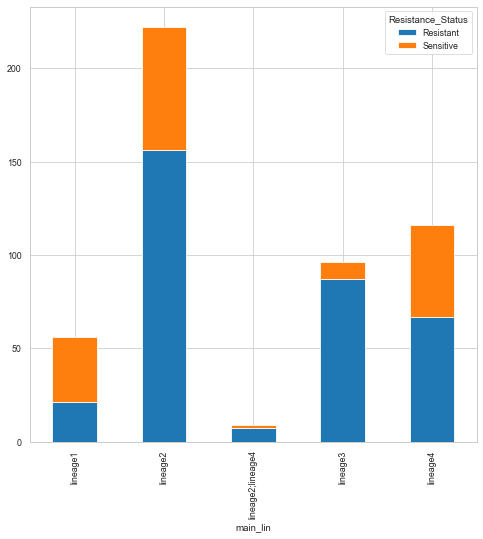

In [27]:
pd.crosstab(index= binarized_resistance_status_test_df['main_lin'], columns=binarized_resistance_status_test_df["Resistance_Status"]).plot(kind="bar", figsize=(8,8), stacked=True)

## EDA for genomic pre-processing results